<a href="https://colab.research.google.com/github/RetroZhou/AdminLTE-admin/blob/master/Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

'2022-10-21 Suggesstion&Complain.rar'   gpt_apple.xlsx
'412875 周瑞哲.pdf'		       'Invigilator Application Form - March 2022.docx'
 ASTRI				        Notability
'CAEE-Flowchart (1).drawio'	        Photo
 CAEE-Flowchart.drawio		       'Rebuttal Letter（副本）.gdoc'
'Colab Notebooks'		        ZLibrary
 corr.csv			       'ZLibrary (1)'
 Example2.ipynb			       '无标题演示文稿 (1).gslides'
 Example_version.ipynb		        无标题演示文稿.gslides


## SVM

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# 读取数据
data = pd.read_excel('./gpt_apple.xlsx')

# 将连续情感分数映射为离散类别
# def map_score_to_category(score):
#     if score < 0:
#         return -1
#     elif score > 0:
#         return 1
#     else:
#         return 0
# 将连续情感分数映射为离散类别
def map_score_to_category(score):
    if score < 0:
        return -1
    else :
        return 1

data['emotion_category'] = data['Score'].apply(map_score_to_category)

# 分割数据为训练集和测试集
X = data['hd']
y = data['emotion_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用TF-IDF特征提取
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 创建SVM模型
svm_model = SVC(kernel='linear', C=1.0)

# 训练模型
svm_model.fit(X_train_tfidf, y_train)

# 预测情感类别
y_pred = svm_model.predict(X_test_tfidf)

# 输出评估指标
print(classification_report(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

          -1       1.00      0.02      0.03       132
           1       0.79      1.00      0.88       485

    accuracy                           0.79       617
   macro avg       0.89      0.51      0.46       617
weighted avg       0.83      0.79      0.70       617

Accuracy: 0.7893030794165316


## 朴素贝叶斯

In [8]:
import pandas as pd
import numpy as np
import jieba
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# 读取数据
data = pd.read_excel('/content/drive/MyDrive/gpt_apple.xlsx')

# 将连续情感分数映射为二元类别
def map_score_to_binary(score):
    if score >= 0:
        return 1  # 正面
    else:
        return 0  # 非正面

data['emotion_binary'] = data['Score'].apply(map_score_to_binary)
# 分割数据为训练集和测试集
X = data['hd']
y = data['emotion_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用TF-IDF特征提取
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 构建贝叶斯算法分类器
mb = MultinomialNB(alpha=1)  # alpha 为可选项，默认 1.0，添加拉普拉修/Lidstone 平滑参数
# 训练数据
mb.fit(X_train_tfidf, y_train)
# 预测数据
y_predict = mb.predict(X_test_tfidf)
#预测值与真实值展示
# print('预测值：',y_predict)
# print('真实值：',y_test)
report = classification_report(y_test, y_predict) # X_test_tfidf, y_test
print(report)

mb.score(X_test_tfidf, y_test)

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       132
           1       0.79      1.00      0.88       485

    accuracy                           0.79       617
   macro avg       0.89      0.51      0.46       617
weighted avg       0.83      0.79      0.70       617



0.7893030794165316

## 分层采样

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import random
from sklearn.utils import shuffle
import importlib
importlib.invalidate_caches()

df = pd.read_excel('./gpt_apple.xlsx')
df = df.sort_values('Score')

# 设置分割点
# split_index1 = df[df['Score'] < 0].index[-1] + 1
# split_index2 = df[df['Score'] == 0].index[-1] + 1

# subsets = np.array_split(df, [split_index1, split_index2])
# subset1, subset2, subset3 = subsets[:3]

subset1, subset2, subset3 = np.split(df, [df[df['Score'] < 0].index[-1]+1, df[df['Score'] == 0].index[-1]+1])
# subset1, subset2, subset3 = np.array_split(df, [df[df['Score'] < 0].index[-1]+1, df[df['Score'] == 0].index[-1]+1] + [len(df)])
train1 = subset1.sample(frac=0.7)
test1 = subset1.drop(train1.index)

train2 = subset2.sample(frac=0.7)
test2 = subset2.drop(train2.index)

train3 = subset3.sample(frac=0.7)
test3 = subset3.drop(train3.index)

train_set = pd.concat([train1, train2, train3])
test_set = pd.concat([test1, test2, test3])
train_set = shuffle(train_set)
test_set = shuffle(test_set)
X_train = train_set['hd']
y_train = train_set['Score']
X_test = test_set['hd']
y_test = test_set['Score']
y_train = train_set['Score']
y_test = test_set['Score']
data=pd.concat([train_set, test_set])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## LSTM

Epoch 1/50
68/68 - 2s - 32ms/step - loss: 0.6948 - val_loss: 0.3248
Epoch 2/50
68/68 - 1s - 14ms/step - loss: 0.1849 - val_loss: 0.1097
Epoch 3/50
68/68 - 1s - 10ms/step - loss: 0.0805 - val_loss: 0.0684
Epoch 4/50
68/68 - 1s - 8ms/step - loss: 0.0598 - val_loss: 0.0589
Epoch 5/50
68/68 - 0s - 7ms/step - loss: 0.0546 - val_loss: 0.0559
Epoch 6/50
68/68 - 0s - 5ms/step - loss: 0.0516 - val_loss: 0.0545
Epoch 7/50
68/68 - 1s - 9ms/step - loss: 0.0497 - val_loss: 0.0548
Epoch 8/50
68/68 - 0s - 5ms/step - loss: 0.0478 - val_loss: 0.0563
Epoch 9/50
68/68 - 1s - 9ms/step - loss: 0.0447 - val_loss: 0.0580
Epoch 10/50
68/68 - 0s - 5ms/step - loss: 0.0401 - val_loss: 0.0593
Epoch 11/50
68/68 - 0s - 5ms/step - loss: 0.0356 - val_loss: 0.0597
Epoch 12/50
68/68 - 0s - 5ms/step - loss: 0.0324 - val_loss: 0.0594
Epoch 13/50
68/68 - 1s - 9ms/step - loss: 0.0301 - val_loss: 0.0576
Epoch 14/50
68/68 - 0s - 5ms/step - loss: 0.0282 - val_loss: 0.0567
Epoch 15/50
68/68 - 0s - 5ms/step - loss: 0.0267 - val

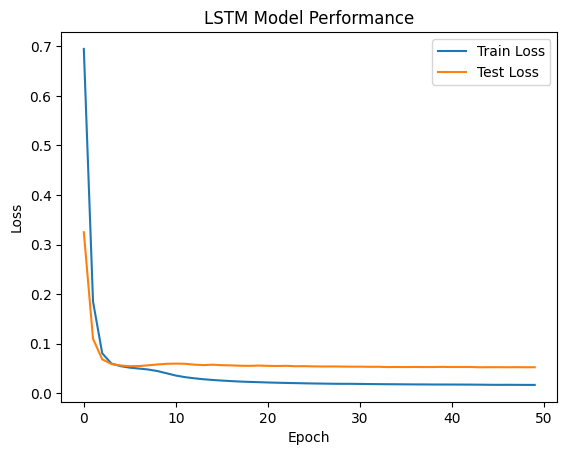

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle
import importlib
importlib.invalidate_caches()
df = pd.read_excel('./gpt_apple.xlsx')

data = shuffle(df)
mean_score = data['Score'].mean()
# def map_score_to_category(score):
#     if score < 0:
#         return -1
#     else :
#         return 1
# def map_score_to_category(score):
#     if score < 0:
#         return -1
#     elif score > 0:
#         return 1
#     else:
#         return 0
#data['emotion_category'] = data['score'].apply(map_score_to_category)
#data['score'].fillna(mean_score, inplace=True)
scores =data['Score']
# 构建词汇表，将标题文本转换为数字序列
tokenizer = tf.keras.layers.TextVectorization(output_mode='int')
tokenizer.adapt(data['hd'])

# 将标题文本转换为数字序列
title_sequences = tokenizer(data['hd']).numpy()

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(title_sequences, np.array(scores), test_size=0.3, random_state=42) # 0.2 0.4

# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.LSTM(64,kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# 编译模型
model.compile(optimizer, loss='mean_squared_error')

# 记录损失
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)
train_loss = history.history['loss']
test_loss = history.history['val_loss']
#output_file = 'lstm.txt'

# with open(output_file, 'w') as f:
#   f.write(str(history.history))
# f.close()
# 绘图
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('LSTM Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## ATT_LSTM

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'attention_layer_1' (of type AttentionLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


68/68 - 3s - 38ms/step - custom_accuracy: 0.9070 - loss: 0.5657 - val_custom_accuracy: 0.9134 - val_loss: 0.2319
Epoch 2/50
68/68 - 1s - 15ms/step - custom_accuracy: 0.9078 - loss: 0.1318 - val_custom_accuracy: 0.9134 - val_loss: 0.0729
Epoch 3/50
68/68 - 1s - 10ms/step - custom_accuracy: 0.9071 - loss: 0.0608 - val_custom_accuracy: 0.9191 - val_loss: 0.0526
Epoch 4/50
68/68 - 1s - 8ms/step - custom_accuracy: 0.9052 - loss: 0.0529 - val_custom_accuracy: 0.9191 - val_loss: 0.0511
Epoch 5/50
68/68 - 0s - 6ms/step - custom_accuracy: 0.9076 - loss: 0.0523 - val_custom_accuracy: 0.9191 - val_loss: 0.0510
Epoch 6/50
68/68 - 0s - 7ms/step - custom_accuracy: 0.9053 - loss: 0.0524 - val_custom_accuracy: 0.9191 - val_loss: 0.0511
Epoch 7/50
68/68 - 0s - 6ms/step - custom_accuracy: 0.9079 - loss: 0.0523 - val_custom_accuracy: 0.9134 - val_loss: 0.0513
Epoch 8/50
68/68 - 0s - 6ms/step - custom_accuracy: 0.9064 - loss: 0.0523 - val_custom_accuracy: 0.9191 - val_loss: 0.0510
Epoch 9/50
68/68 - 1s - 

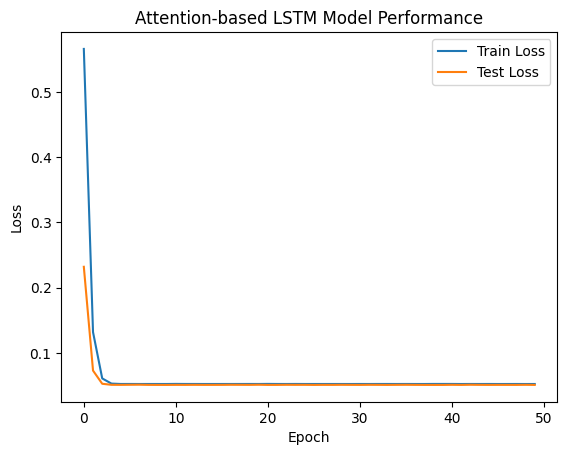

In [20]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Layer, Embedding, LSTM, Dense

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform")
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform")
        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        v = x

        attention_weights = tf.nn.softmax(tf.matmul(q, k, transpose_b=True), axis=-1)
        output = tf.matmul(attention_weights, v)
        return output

    def compute_output_shape(self, input_shape):
        return input_shape
# 定义新闻标题数据和对应的分数数据
# df = pd.read_excel('cotton.xlsx')
# data = shuffle(df)
#mean_score = data['score'].mean()
#data['score'].fillna(mean_score, inplace=True)
# def map_score_to_category(score):
#     if score <= 0:
#         return 0
#     else:
#         return 1
# data['emotion_category'] = data['score'].apply(map_score_to_category)
# scores = data['emotion_category']

# 构建词汇表，将标题文本转换为数字序列
tokenizer = tf.keras.layers.TextVectorization(output_mode='int')
tokenizer.adapt(data['hd'])

# 将标题文本转换为数字序列
title_sequences = tokenizer(data['hd']).numpy()

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(title_sequences, np.array(scores), test_size=0.3, random_state=42)


# 构建模型
input_layer = tf.keras.layers.Input(shape=(title_sequences.shape[1],))
embedding_layer = Embedding(input_dim=len(tokenizer.get_vocabulary()), output_dim=64, mask_zero=True)(input_layer)
lstm_layer = LSTM(64, kernel_regularizer=regularizers.l2(0.01),return_sequences=True)(embedding_layer)
attention_layer = AttentionLayer()(lstm_layer)
output_layer = Dense(1)(attention_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
# 定义精度指标函数
def custom_accuracy(y_true, y_pred):
    threshold = 0.4  # 自定义阈值 0.5 0.1 0.3
    absolute_error = tf.abs(y_true - y_pred)
    correct_predictions = tf.reduce_mean(tf.cast(absolute_error < threshold, tf.float32))
    return correct_predictions

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_accuracy])

# 训练模型
#model.fit(X_train, y_train, epochs=100, verbose=2)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)
train_loss = history.history['loss']
test_loss = history.history['val_loss']
accuracy = history.history['custom_accuracy']  # 获取精度值

# 绘图
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Attention-based LSTM Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('myplot111.png', dpi=300)

## seq2seq

In [5]:
!pip3 install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # 读取数据
# data = pd.read_excel('gpt_apple.xlsx')

# titles = data['hd']
# scores = data['Score']

# # 文本标记化
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(titles)
# sequences = tokenizer.texts_to_sequences(titles)


# max_len = max([len(seq) for seq in sequences])
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
# labels = np.array(scores)

# X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42) #0.2 0.4

# vocab_size = len(tokenizer.word_index) + 1
# embedding_dim = 16
# latent_dim = 32

# # Encoder
# encoder_inputs = tf.keras.layers.Input(shape=(max_len,))
# encoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(encoder_inputs)
# encoder_lstm = tf.keras.layers.LSTM(latent_dim)(encoder_embedding)
# encoder_outputs, state_h, state_c = tf.keras.layers.LSTM(latent_dim, return_state=True)(encoder_embedding)
# encoder_states = [state_h, state_c]

# # Decoder
# decoder_inputs = tf.keras.layers.Input(shape=(max_len,))
# decoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(decoder_inputs)
# decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
# decoder_dense = tf.keras.layers.Dense(1, activation='linear')
# decoder_outputs = decoder_dense(decoder_outputs)

# model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# history = model.fit([X_train, X_train], y_train, epochs=50, batch_size=1, validation_split=0.2)

# loss, mae = model.evaluate([X_test, X_test], y_test)
# print("Test Mean Absolute Error:", mae)

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd

# 检查GPU是否可用
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 设置GPU内存增长
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # 内存增长必须在程序启动时设置
        print(e)

# 读取数据
data = pd.read_excel('gpt_apple.xlsx')

titles = data['hd']
scores = data['Score']

# 文本标记化并行处理
def tokenize_text(index):
    return tokenizer.texts_to_sequences([titles.iloc[index]])[0]

# 初始化tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles)

# 使用ThreadPoolExecutor并行化文本到序列的转换
with ThreadPoolExecutor(max_workers=32) as executor:
    futures_to_index = {executor.submit(tokenize_text, i): i for i in range(len(titles))}
    sequences = []
    for future in as_completed(futures_to_index):
        index = futures_to_index[future]
        sequences.append(future.result())
        del futures_to_index[future]

max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
labels = np.array(scores)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 16
latent_dim = 32

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(max_len,))
encoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim)(encoder_embedding)
encoder_outputs, state_h, state_c = tf.keras.layers.LSTM(latent_dim, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(max_len,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(1, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit([X_train, X_train], y_train, epochs=50, batch_size=1, validation_split=0.2)

loss, mae = model.evaluate([X_test, X_test], y_test)
print("Test Mean Absolute Error:", mae)

Physical devices cannot be modified after being initialized
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1727/1727 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.1734 - val_loss: 0.0497 - val_mean_absolute_error: 0.1678
Epoch 2/50
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.1436 - val_loss: 0.0633 - val_mean_absolute_error: 0.1870
Epoch 3/50
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.1201 - val_loss: 0.0495 - val_mean_absolute_error: 0.1644
Epoch 4/50
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0760 - val_loss: 0.0524 - val_mean_absolute_error: 0.1679
Epoch 5/50
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0787 - val_loss: 0.0524 - val_mean_absolute_error: 0.1693
Epoch 6/50
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0708 - val_loss: 0.0498 - val_mean_absolute_error: 0.1638
Epoch 7/50
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0104 - mean_absolute_error: 

## transformer

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

# 读取数据
data = pd.read_excel('gpt_apple.xlsx')

titles = data['hd']
scores = data['Score']

# 文本标记化
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles)
sequences = tokenizer.texts_to_sequences(titles)

# 序列填充
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# 标签处理
labels = np.array(scores)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 32
num_heads = 2
dff = 32
num_encoder_layers = 2

# 位置编码
def positional_encoding(position, d_model):
    angle_rads = np.arange(position)[:, np.newaxis] / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

# 建立Transformer模型
class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.multi_head_attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.multi_head_attention(inputs, inputs, return_attention_scores=False, training=training)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)
        self.enc_layers = [TransformerEncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=None):
        seq_len = tf.shape(inputs)[1]
        inputs = self.embedding(inputs)
        inputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        inputs += self.pos_encoding[:, :seq_len, :]
        inputs = self.dropout(inputs, training=training)
        for i in range(self.num_layers):
            inputs = self.enc_layers[i](inputs, training=training)
        return inputs

# 构建Transformer模型
class TransformerModel(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(TransformerModel, self).__init__()
        self.encoder = TransformerEncoder(num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate)
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(1, activation='linear')

    def call(self, inputs, training=None):
        enc_output = self.encoder(inputs, training=training)
        flattened_output = self.flatten(enc_output)
        output = self.dense(flattened_output)
        return output

# 初始化并训练模型
model = TransformerModel(
    num_layers=num_encoder_layers,
    d_model=embedding_dim,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=vocab_size,
    maximum_position_encoding=max_len,
)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

loss, mae = model.evaluate(X_test, y_test)
# print("Test Mean Absolute Error:", mae)

Epoch 1/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.1969 - mean_absolute_error: 0.3379 - val_loss: 0.0553 - val_mean_absolute_error: 0.1743
Epoch 2/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0590 - mean_absolute_error: 0.1840 - val_loss: 0.0721 - val_mean_absolute_error: 0.2049
Epoch 3/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0333 - mean_absolute_error: 0.1395 - val_loss: 0.0575 - val_mean_absolute_error: 0.1808
Epoch 4/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.1097 - val_loss: 0.0552 - val_mean_absolute_error: 0.1728
Epoch 5/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0882 - val_loss: 0.0561 - val_mean_absolute_error: 0.1760
Epoch 6/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0737 - val_loss: 0.0551 - val_mean_absolute_error: 0.1735
Epoch 7/50
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0096 - mean_absolute_